In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scale_image_path = '../../images/cropped_scales/random'
images = os.listdir(scale_image_path)
images = [os.path.join(scale_image_path, image) for image in images if image.endswith('only.jpg')]

In [3]:
def contour_solidity(contour):
    area = cv2.contourArea(contour)
    hull_area = cv2.contourArea(cv2.convexHull(contour))
    return float(area) / hull_area if hull_area != 0 else 0


def draw_contours(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_name = image_path.split('\\')[-1]

    # Threshold to find black regions
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    

    # Filter contours by size, solidity, and position
    filtered_contours = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        if (cv2.contourArea(c) > 100 and 0.8 < aspect_ratio < 1.2 and
            contour_solidity(c) > 0.9 and y > 10):  # Adjust the value of y to exclude very top contours
            filtered_contours.append(c)

    # Sort the contours from top to bottom
    filtered_contours = sorted(filtered_contours, key=lambda c: cv2.boundingRect(c)[1])

    # Select the contour which is the large black square
    if filtered_contours:
        target_square = filtered_contours[0]
        x, y, w, h = cv2.boundingRect(target_square)
        square_height_in_pixels = h
        square_width_in_pixels = w

        # Draw the bounding box around the large black square on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    else:
        square_height_in_pixels = None
        square_width_in_pixels = None

    print(f'Image: {image_name}')
    print(f'Square height in pixels: {square_height_in_pixels}')
    print(f'Square width in pixels: {square_width_in_pixels}')

    # Display the image with the largest square
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

Image: 1701289594_scale_only.jpg
Square height in pixels: 210
Square width in pixels: 210


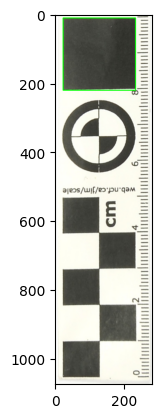

Image: 1701289603_scale_only.jpg
Square height in pixels: 210
Square width in pixels: 206


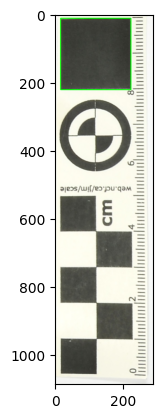

Image: 1701290100_scale_only.jpg
Square height in pixels: 216
Square width in pixels: 217


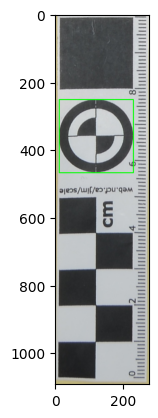

Image: 1701290369_scale_only.jpg
Square height in pixels: 209
Square width in pixels: 208


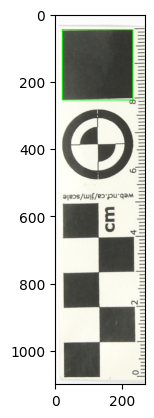

Image: 1701324381_scale_only.jpg
Square height in pixels: 210
Square width in pixels: 207


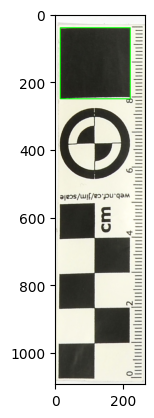

Image: 1701328175_scale_only.jpg
Square height in pixels: 208
Square width in pixels: 209


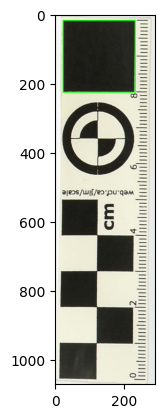

Image: 1701346319_scale_only.jpg
Square height in pixels: 208
Square width in pixels: 212


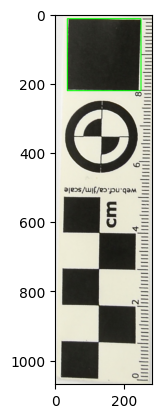

Image: 1701566034_scale_only.jpg
Square height in pixels: 321
Square width in pixels: 322


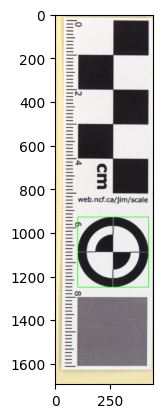

Image: 1701774677_scale_only.jpg
Square height in pixels: 211
Square width in pixels: 212


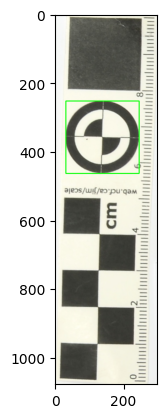

Image: 1806488217_scale_only.jpg
Square height in pixels: 104
Square width in pixels: 107


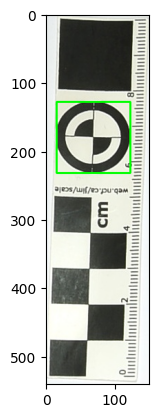

Image: 1809436008_scale_only.jpg
Square height in pixels: 12
Square width in pixels: 14


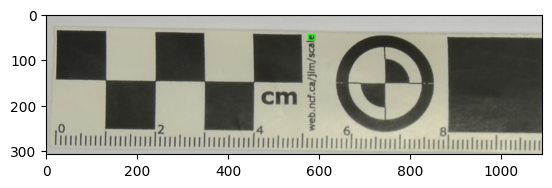

Image: 1809436017_scale_only.jpg
Square height in pixels: 102
Square width in pixels: 105


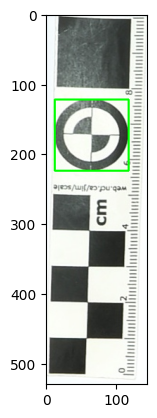

Image: 1809436023_scale_only.jpg
Square height in pixels: 212
Square width in pixels: 217


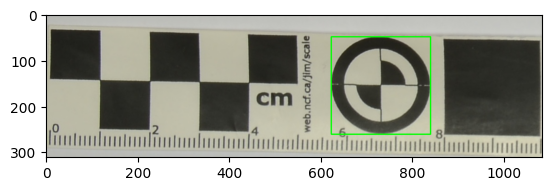

Image: 1837334846_scale_only.jpg
Square height in pixels: 108
Square width in pixels: 109


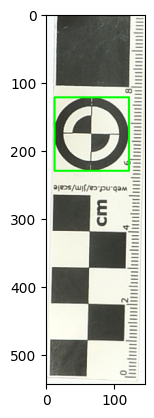

Image: 1837335289_scale_only.jpg
Square height in pixels: 106
Square width in pixels: 108


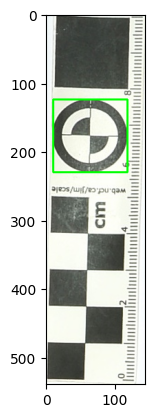

Image: 1837799908_scale_only.jpg
Square height in pixels: 107
Square width in pixels: 107


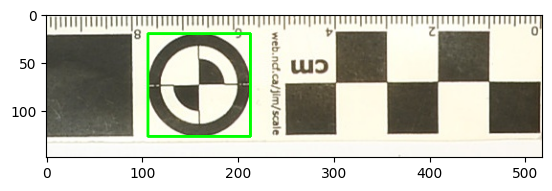

Image: 1837799938_scale_only.jpg
Square height in pixels: 105
Square width in pixels: 105


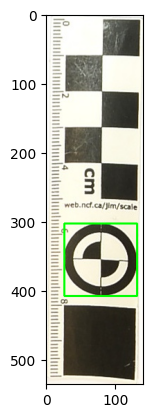

Image: 1990838997_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


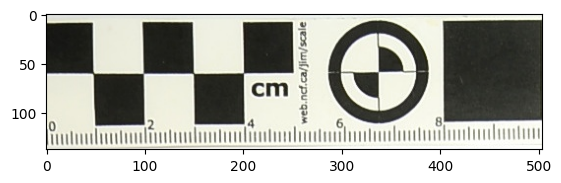

Image: 2234228274_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


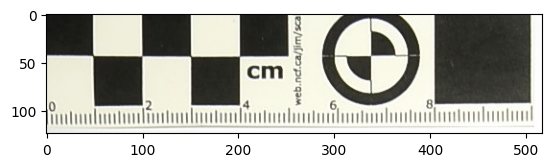

Image: 2234228293_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


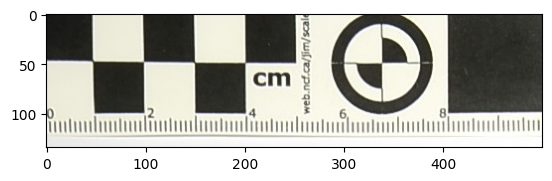

Image: 2234228402_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


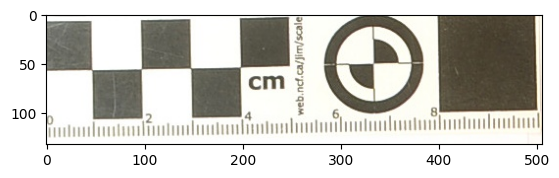

Image: 2234228413_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


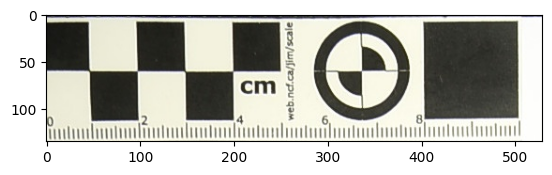

Image: 2234228461_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


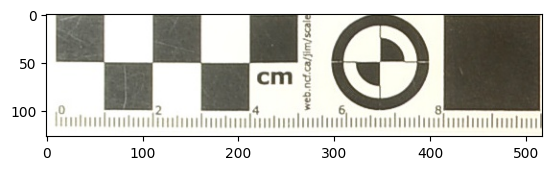

Image: 2234228506_scale_only.jpg
Square height in pixels: 50
Square width in pixels: 50


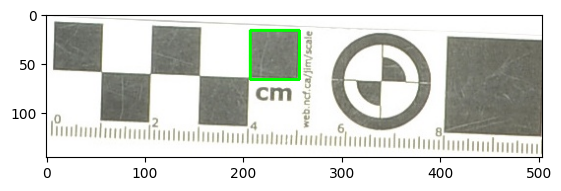

Image: 2234228578_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


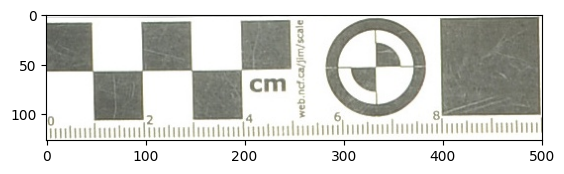

Image: 2234228618_scale_only.jpg
Square height in pixels: 99
Square width in pixels: 100


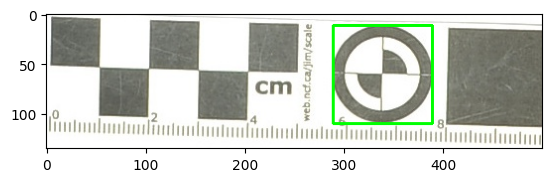

Image: 2248478251_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


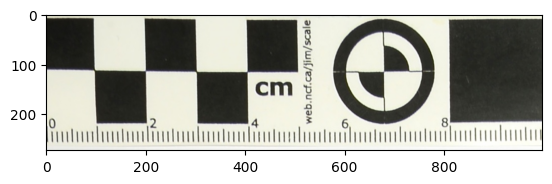

Image: 2427934089_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


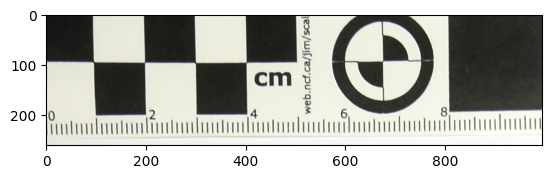

Image: 2428438114_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


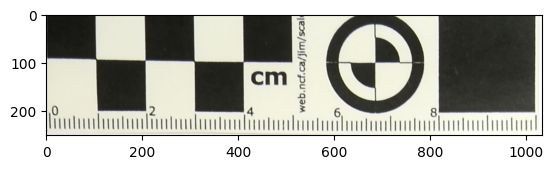

Image: 2452362338_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


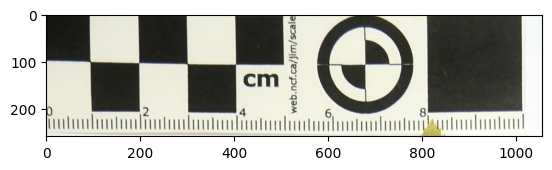

Image: 2452362457_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


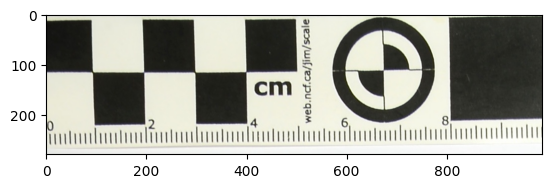

Image: 2461260218_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


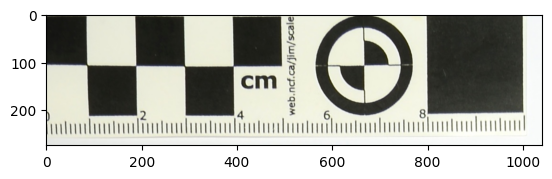

Image: 2853562301_scale_only.jpg
Square height in pixels: 199
Square width in pixels: 184


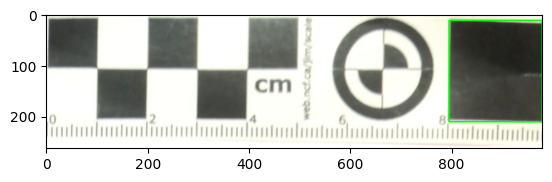

Image: 2856326314_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


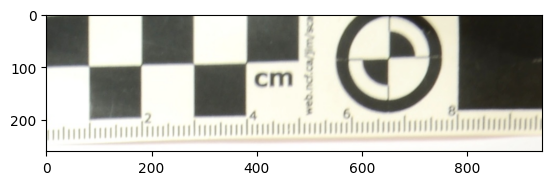

Image: 2856329310_scale_only.jpg
Square height in pixels: 200
Square width in pixels: 202


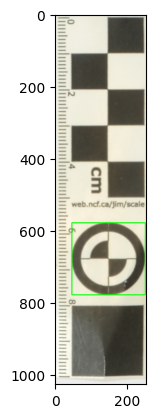

Image: 2856329315_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


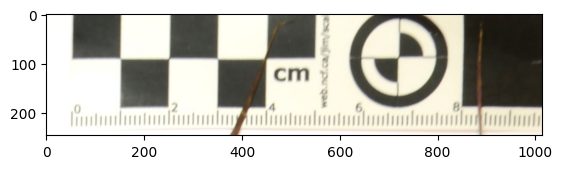

Image: 2856330311_scale_only.jpg
Square height in pixels: 96
Square width in pixels: 99


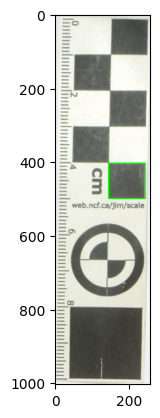

Image: 2856337303_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


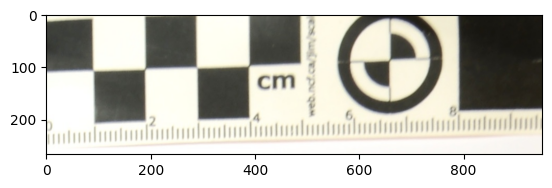

Image: 2856338302_scale_only.jpg
Square height in pixels: 203
Square width in pixels: 201


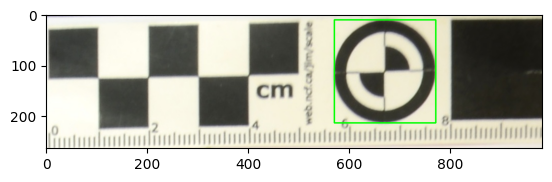

Image: 3015349303_scale_only.jpg
Square height in pixels: 99
Square width in pixels: 98


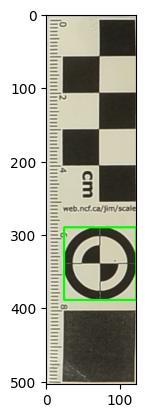

Image: 3018880301_scale_only.jpg
Square height in pixels: 96
Square width in pixels: 96


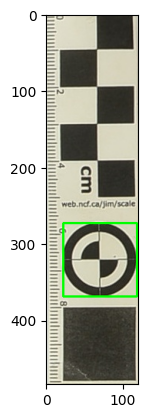

Image: 3018883302_scale_only.jpg
Square height in pixels: 99
Square width in pixels: 100


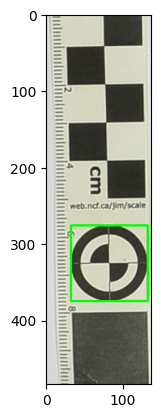

Image: 3018888302_scale_only.jpg
Square height in pixels: 100
Square width in pixels: 100


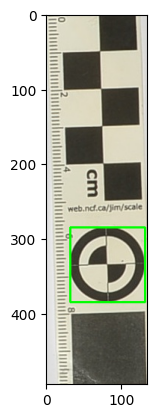

Image: 3381987303_scale_only.jpg
Square height in pixels: 94
Square width in pixels: 95


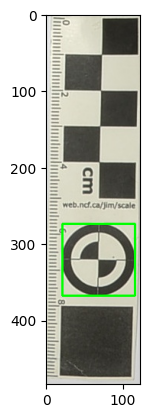

Image: 3382000306_scale_only.jpg
Square height in pixels: 100
Square width in pixels: 99


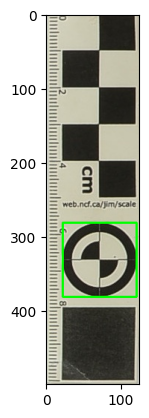

Image: 3382005306_scale_only.jpg
Square height in pixels: 99
Square width in pixels: 99


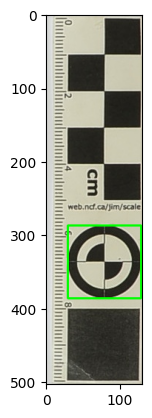

Image: 3397190301_scale_only.jpg
Square height in pixels: None
Square width in pixels: None


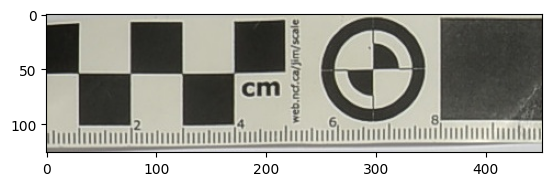

Image: 3397977301_scale_only.jpg
Square height in pixels: 100
Square width in pixels: 99


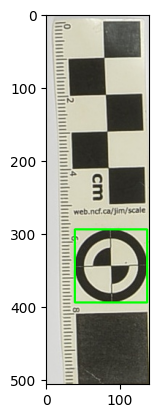

Image: 3406775304_scale_only.jpg
Square height in pixels: 98
Square width in pixels: 98


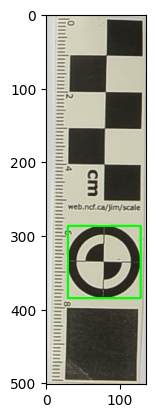

Image: 3412480303_scale_only.jpg
Square height in pixels: 205
Square width in pixels: 199


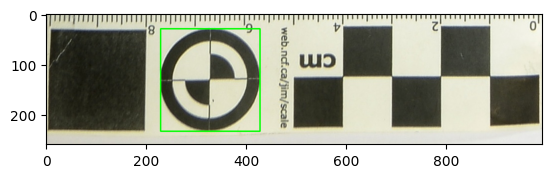

Image: 3417410301_scale_only.jpg
Square height in pixels: 197
Square width in pixels: 199


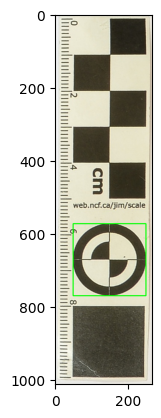

Image: 3419328301_scale_only.jpg
Square height in pixels: 198
Square width in pixels: 199


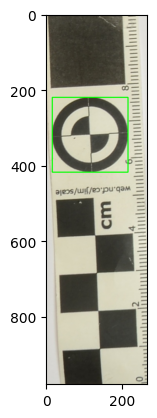

Image: 3807541301_scale_only.jpg
Square height in pixels: 203
Square width in pixels: 198


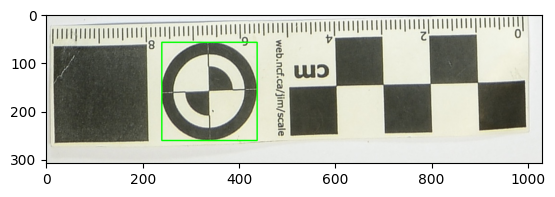

Image: 3922807301_scale_only.jpg
Square height in pixels: 183
Square width in pixels: 182


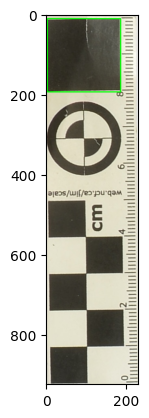

Image: 3990750310_scale_only.jpg
Square height in pixels: 94
Square width in pixels: 94


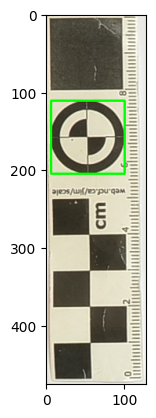

Image: 3990751301_scale_only.jpg
Square height in pixels: 181
Square width in pixels: 183


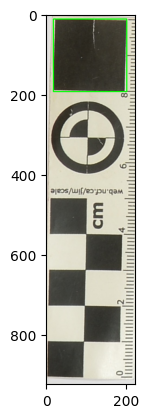

Image: 3994019320_scale_only.jpg
Square height in pixels: 165
Square width in pixels: 136


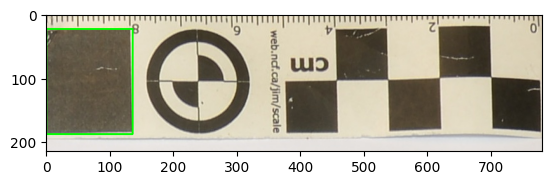

Image: 3994019326_scale_only.jpg
Square height in pixels: 181
Square width in pixels: 183


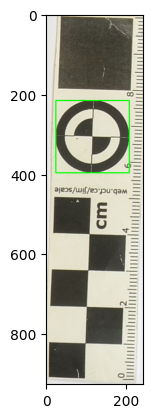

Image: 3999573301_scale_only.jpg
Square height in pixels: 186
Square width in pixels: 183


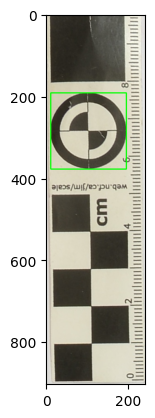

Image: 3999574308_scale_only.jpg
Square height in pixels: 95
Square width in pixels: 96


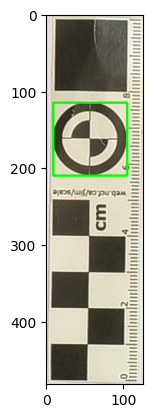

Image: 4002853308_scale_only.jpg
Square height in pixels: 184
Square width in pixels: 184


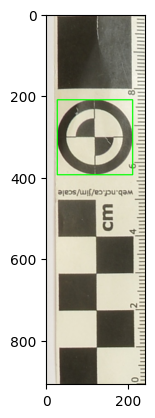

Image: 4002858304_scale_only.jpg
Square height in pixels: 183
Square width in pixels: 182


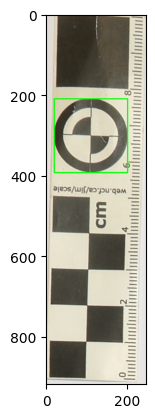

Image: 4106720301_scale_only.jpg
Square height in pixels: 176
Square width in pixels: 176


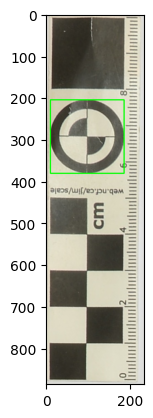

Image: 4155660301_scale_only.jpg
Square height in pixels: 174
Square width in pixels: 173


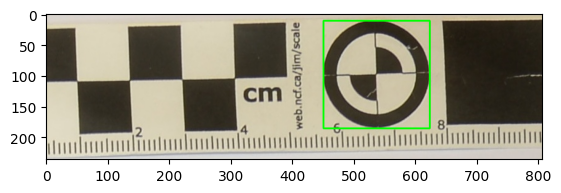

In [4]:
for image in images:
    draw_contours(image)